# Time series analysis

## Table of contents

### [1. Libraries and Data importations](#1)
### [2. Data Preparation](#2)

-[ Data cleaning and subsetting](#2.1)

### [3. Time-series analysis: decomposition](#3)

### [4. Testing for stationarity](#4)

-[ Dickey fuller test](#4.1)

-[ Autocorrelation test](#4.2)

### [5. Stationarizing all causes of deaths](#5)

-[ Differencing method](#5.1)

-[ Dickey fuller test](#5.2)

-[ Autocorrelation test](#5.3)

### [6. Conclusions](#6)

### [7. ARIMA Forecasting](#6)

-[ Defining parameters](#7.1)

-[ Splitting the data](#7.2)

-[ Running and Fitting the Model](#7.3)

-[ Iteratingl](#7.4)


## 1. Libraries and Data importations
<div id='1'></div>

In [5]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import os
from datetime import datetime
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.api import ARIMA

##to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Creating paths to the data folder of the project and to the folder for saving the charts
path_data = r'C:\Users\dacol\Documents\Data Project - careerfoundry\Europe health-deaths analysis\02 Data'
path_viz = r'C:\Users\dacol\Documents\Data Project - careerfoundry\Europe health-deaths analysis\04 Analysis\Visualizations'

#plot style for visuals
plt.style.use('fivethirtyeight')

# Importing the latest merged dataframe
df = pd.read_csv(os.path.join(path_data,'Original Data','estat_hlth_cd_msdr2.tsv'), sep='\t|,')

## 2. Data Preparation
<div id='2'></div>

### Data cleaning and subsetting
<div id='2.1'></div>

In [8]:
df.shape

(20130, 42)

In [9]:
df.head()

,freq,unit,sex,age,icd10,geo\TIME_PERIOD,2019-01,2019-02,2019-03,2019-04,...,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
0,M,RT,F,TOTAL,A-R_V-Y,AT,71.18,67.45,71.78,64.17,...,67.08,65.77,62.4,63.38,60.76,63.41,64.1,69.16,80.21,82.69
1,M,RT,F,TOTAL,A-R_V-Y,BE,73.17,70.37,70.64,61.32,...,64.18,62.8,61.51,55.49,60.07,56.07,56.67,67.46,68.82,75.67
2,M,RT,F,TOTAL,A-R_V-Y,BG,135.83,104.86,108.19,99.8,...,157.6,170.39,121.71,102.4,101.77,113.86,130.45,179.14,191.68,159.04
3,M,RT,F,TOTAL,A-R_V-Y,CY,91.38,73.54,76.69,69.83,...,75.07,78.92,62.22,54.69,82.6,90.69,62.32,65.58,67.24,84.79
4,M,RT,F,TOTAL,A-R_V-Y,CZ,88.92,81.87,82.34,76.14,...,125.84,91.06,76.04,70.58,70.98,70.75,73.47,82.84,104.73,112.63


In [10]:
#keeping only aggregates of genders and ages and death causes (A-R_V-Y)
sub = df.loc[(df['icd10'] == 'A-R_V-Y') &
        (df['sex']== 'T') &
        (df['age']== 'TOTAL')]

sub.head()

,freq,unit,sex,age,icd10,geo\TIME_PERIOD,2019-01,2019-02,2019-03,2019-04,...,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
13281,M,RT,T,TOTAL,A-R_V-Y,AT,82.62,78.86,84.7,74.21,...,81.01,80.21,76.16,75.85,73.15,75.94,75.57,82.77,97.4,96.61
13282,M,RT,T,TOTAL,A-R_V-Y,BE,87.41,81.45,83.35,74.58,...,77.03,78.21,75.99,67.05,69.38,67.15,67.99,80.12,84.69,93.49
13283,M,RT,T,TOTAL,A-R_V-Y,BG,168.69,128.44,133.95,124.4,...,202.78,216.2,154.43,127.68,126.81,139.43,162.08,217.13,235.16,197.71
13284,M,RT,T,TOTAL,A-R_V-Y,CY,106.02,85.42,83.97,78.39,...,82.57,92.73,78,67.13,94.31,99.82,76.78,77.42,84.53,101.83
13285,M,RT,T,TOTAL,A-R_V-Y,CZ,106.87,100.28,101.15,92.51,...,164.99,115.18,95.09,86.48,88.49,87.3,89.76,101.46,128.96,138.34


In [11]:
#droping unecessary columns
sub.drop(['freq','unit','sex','age', 'icd10'], axis=1, inplace=True)
sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 13281 to 13305
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   geo\TIME_PERIOD  25 non-null     object
 1   2019-01          25 non-null     object
 2   2019-02          25 non-null     object
 3   2019-03          25 non-null     object
 4   2019-04          25 non-null     object
 5   2019-05          25 non-null     object
 6   2019-06          25 non-null     object
 7   2019-07          25 non-null     object
 8   2019-08          25 non-null     object
 9   2019-09          25 non-null     object
 10  2019-10          25 non-null     object
 11  2019-11          25 non-null     object
 12  2019-12          25 non-null     object
 13  2020-01          25 non-null     object
 14  2020-02          25 non-null     object
 15  2020-03          25 non-null     object
 16  2020-04          25 non-null     object
 17  2020-05          25 non-null     ob

In [12]:
#transposing the dataframe
sub_t = sub.T.reset_index()
sub_t.head()

,index,13281,13282,13283,13284,13285,13286,13287,13288,13289,...,13296,13297,13298,13299,13300,13301,13302,13303,13304,13305
0,geo\TIME_PERIOD,AT,BE,BG,CY,CZ,DK,EE,EL,ES,...,IT,LT,LU,MT,NO,RO,RS,SI,SK,TR
1,2019-01,82.62,87.41,168.69,106.02,106.87,90.27,111.12,99.68,83.82,...,85.22,134.85,75.43,105.64,:,150.11,151.28,97.52,114.94,:
2,2019-02,78.86,81.45,128.44,85.42,100.28,85.76,93.57,82.28,70.91,...,77.02,111.69,75.84,83.31,:,122.38,142.9,89.03,118.81,:
3,2019-03,84.7,83.35,133.95,83.97,101.15,83.29,96.55,83.75,69.86,...,75.19,112.12,72.8,87.47,:,129.54,137.09,85.87,114.08,:
4,2019-04,74.21,74.58,124.4,78.39,92.51,80.91,88.75,77.11,64.5,...,66.82,105.03,62.65,70.66,:,116.69,125.03,74.9,101.22,:


In [13]:
#isolating the first row as header
header = sub_t.iloc[0]

In [14]:
#keeping all rows below first row
sub_t_ind = sub_t[1:]

In [15]:
#adding columns names
sub_t_ind.columns = header

In [16]:
sub_t_ind.head()

,geo\TIME_PERIOD,AT,BE,BG,CY,CZ,DK,EE,EL,ES,...,IT,LT,LU,MT,NO,RO,RS,SI,SK,TR
1,2019-01,82.62,87.41,168.69,106.02,106.87,90.27,111.12,99.68,83.82,...,85.22,134.85,75.43,105.64,:,150.11,151.28,97.52,114.94,:
2,2019-02,78.86,81.45,128.44,85.42,100.28,85.76,93.57,82.28,70.91,...,77.02,111.69,75.84,83.31,:,122.38,142.9,89.03,118.81,:
3,2019-03,84.7,83.35,133.95,83.97,101.15,83.29,96.55,83.75,69.86,...,75.19,112.12,72.8,87.47,:,129.54,137.09,85.87,114.08,:
4,2019-04,74.21,74.58,124.4,78.39,92.51,80.91,88.75,77.11,64.5,...,66.82,105.03,62.65,70.66,:,116.69,125.03,74.9,101.22,:
5,2019-05,73.55,74.01,125.65,80.47,91.95,80.04,95.29,77.09,63.81,...,65.91,108.37,66.79,66.81,:,116.37,123.92,74.9,96.4,:


In [17]:
# Striping all white spaces from the dataframe

#creating the function for striping all whitespaces
def whitespace_remover(dataframe):
    for i in dataframe.columns:
        if dataframe[i].dtype == 'object':
            dataframe[i] = dataframe[i].map(str.strip)
        else:
            pass

whitespace_remover(sub_t_ind)

In [18]:
#cleaning all columns with death counts : striping, letters removing and setting as floats
sub_t_ind[[i for i in list(sub_t_ind.columns) if i != 'geo\TIME_PERIOD']] = sub_t_ind[[i for i in list(sub_t_ind.columns) if i != 'geo\TIME_PERIOD']].replace(to_replace = r'[a-z]',value = '', inplace=False, regex=True).apply(pd.to_numeric, errors='coerce')

In [19]:
sub_t_ind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 1 to 36
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   geo\TIME_PERIOD  36 non-null     object 
 1   AT               36 non-null     float64
 2   BE               36 non-null     float64
 3   BG               36 non-null     float64
 4   CY               36 non-null     float64
 5   CZ               36 non-null     float64
 6   DK               36 non-null     float64
 7   EE               36 non-null     float64
 8   EL               36 non-null     float64
 9   ES               36 non-null     float64
 10  FI               36 non-null     float64
 11  FR               36 non-null     float64
 12  HR               36 non-null     float64
 13  HU               36 non-null     float64
 14  IE               36 non-null     float64
 15  IS               36 non-null     float64
 16  IT               36 non-null     float64
 17  LT               3

In [20]:
#creating a new aggregate column for all countries
sub_t_ind['sum_all_countries'] = sub_t_ind.sum(axis=1, numeric_only=True)

In [21]:
sub_t_ind.head()

,geo\TIME_PERIOD,AT,BE,BG,CY,CZ,DK,EE,EL,ES,...,LT,LU,MT,NO,RO,RS,SI,SK,TR,sum_all_countries
1,2019-01,82.62,87.41,168.69,106.02,106.87,90.27,111.12,99.68,83.82,...,134.85,75.43,105.64,NaN,150.11,151.28,97.52,114.94,NaN,2454.26
2,2019-02,78.86,81.45,128.44,85.42,100.28,85.76,93.57,82.28,70.91,...,111.69,75.84,83.31,NaN,122.38,142.90,89.03,118.81,NaN,2153.34
3,2019-03,84.70,83.35,133.95,83.97,101.15,83.29,96.55,83.75,69.86,...,112.12,72.80,87.47,NaN,129.54,137.09,85.87,114.08,NaN,2175.12
4,2019-04,74.21,74.58,124.40,78.39,92.51,80.91,88.75,77.11,64.50,...,105.03,62.65,70.66,NaN,116.69,125.03,74.90,101.22,NaN,1973.48
5,2019-05,73.55,74.01,125.65,80.47,91.95,80.04,95.29,77.09,63.81,...,108.37,66.79,66.81,NaN,116.37,123.92,74.90,96.40,NaN,1970.26


In [22]:
#creating the final subset with only the aggregae and the dates
sub_final = sub_t_ind[['geo\TIME_PERIOD','sum_all_countries']].dropna()

In [23]:
#Transforming the index to a datetime
sub_final = sub_final.reset_index()
sub_final['datetime'] = pd.to_datetime(sub_final['geo\TIME_PERIOD'])

sub_final = sub_final.set_index('datetime') # Set the datetime as the index of the dataframe.
sub_final.drop(columns =['geo\TIME_PERIOD', 'index'], axis=1, inplace=True) # Drop the "year" and 'index' column.
sub_final.head()

,sum_all_countries
datetime,
2019-01-01,2454.26
2019-02-01,2153.34
2019-03-01,2175.12
2019-04-01,1973.48
2019-05-01,1970.26


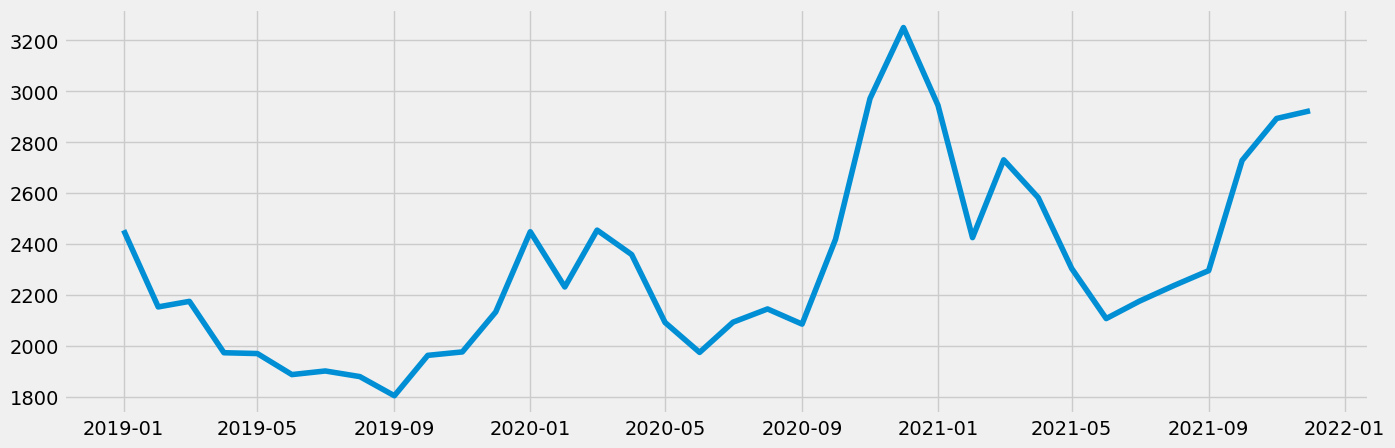

In [24]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(sub_final)
plt.show()

This data set with 36 entries (3 years) showing the evolution of standardized death rates in Europe shows a high peek at the end of 2020, with an educated guess of the impact of the COVID-19 epidemic. 
- There might be a slight positive trend but not very clear
- Seasonality could be possible on Januaries, but not very clear on this graph
- The time span isn't large enough to see any cycle in it
- There is not much noise, except for the high peek on 2020

In [127]:
#saving the data to an excel for future reference (Tableau)
sub_final.to_excel(os.path.join(path_data, 'Prepared Data', 'time_series.xlsx'))

## 3. Time-series analysis: decomposition
<div id='3'></div>

The trend being more linear, an additive rather than a multiplicative model will be used here

In [27]:
# Decompose the time series using an additive model
decomposition = sm.tsa.seasonal_decompose(sub_final, model='additive')

In [28]:
#defining a fixed size for all special charts
rcParams['figure.figsize'] = 18, 7

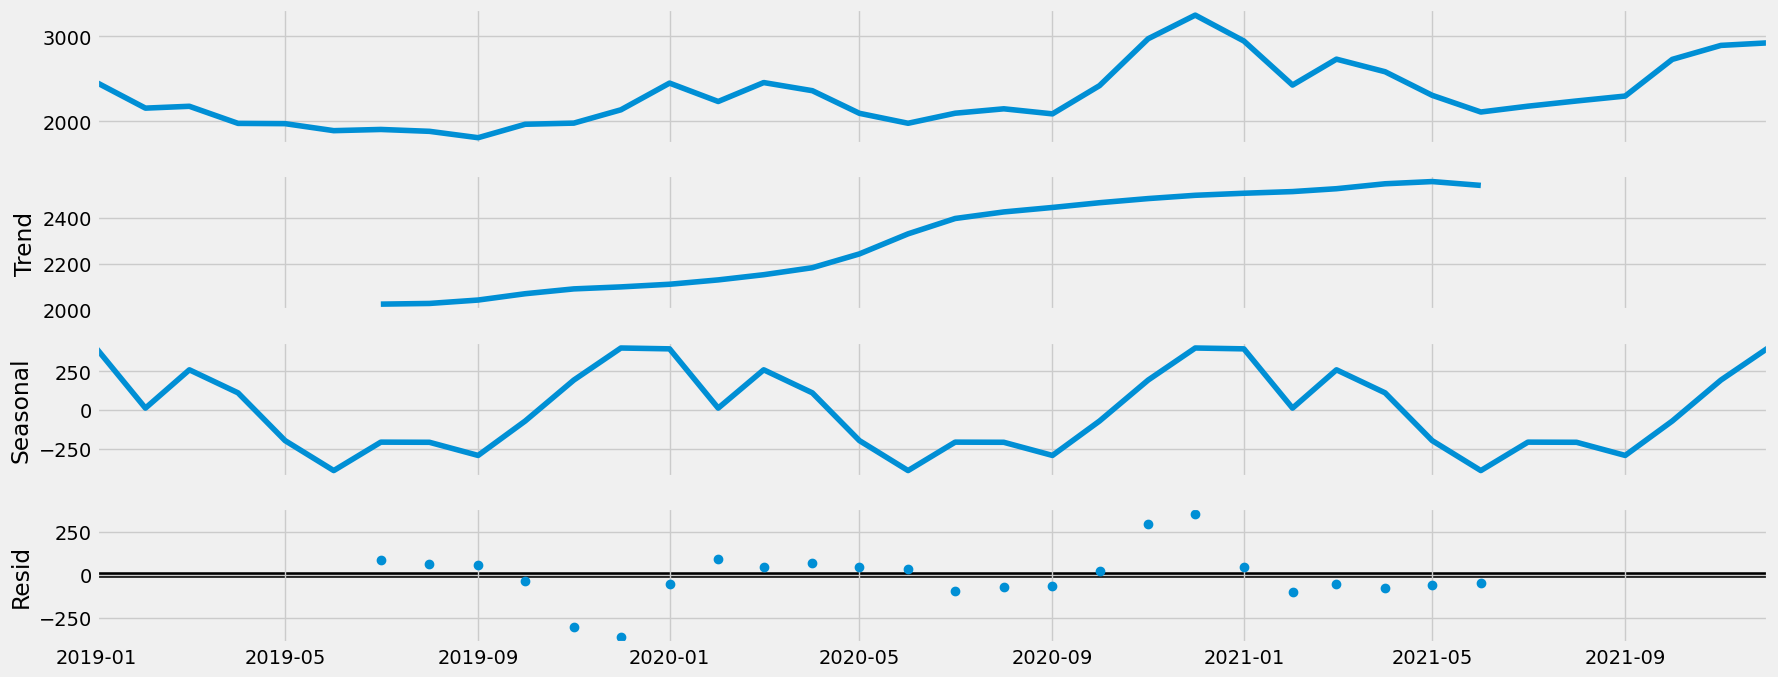

In [29]:
# creating a visual to check the decomposition
decomposition.plot()
plt.show()

**Fom this decomposition :**
- There is a positive trend
- There is a seasonality, mostly on winter seasons
- There is some residual noise which might be explained by Covid

***This time series is most likely not stationary***

## 4. Testing for stationarity
<div id='4'></div>

### Dickey Fuller test
<div id='4.1'></div>

In [33]:
def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(sub_final['sum_all_countries'])

Dickey-Fuller Stationarity test:
Test Statistic                 -2.090521
p-value                         0.248343
Number of Lags Used             1.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


The statistical test being higher than the critical value of 5% is greater, meaning than the implied null hypothesis (the time series is not stationary) cannot be excluded : It means that the time series holds a unit root and is actually non-stationary !

### Autocorrelation test
<div id='4.2'></div>

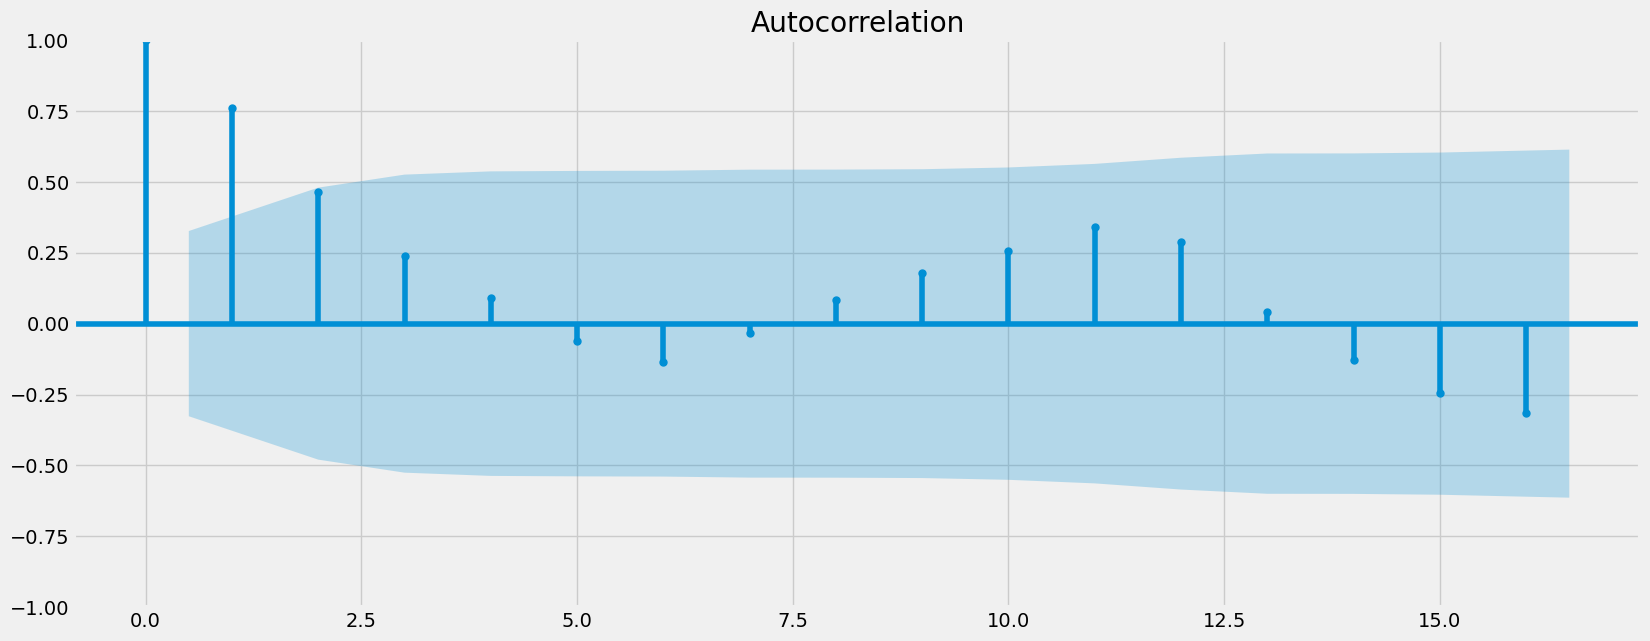

In [36]:
#checking for an autocorrelation in the tilme series
plot_acf(sub_final)
plt.show()

There are not many lags (2) out of the confidence zone, accouting for a very small autocorrelation in the time series.

## 5. Stationarizing all causes of deaths
<div id='5'></div>

### Diffrencing method
<div id='5.1'></div>

In [40]:
# Transforming by applying a differencing method : t - (t -1)
sub_diff = sub_final - sub_final.shift(1)

In [41]:
#droing nan values from the differencing
sub_diff.dropna(inplace = True)

In [42]:
sub_diff.head()

,sum_all_countries
datetime,
2019-02-01,-300.92
2019-03-01,21.78
2019-04-01,-201.64
2019-05-01,-3.22
2019-06-01,-82.58


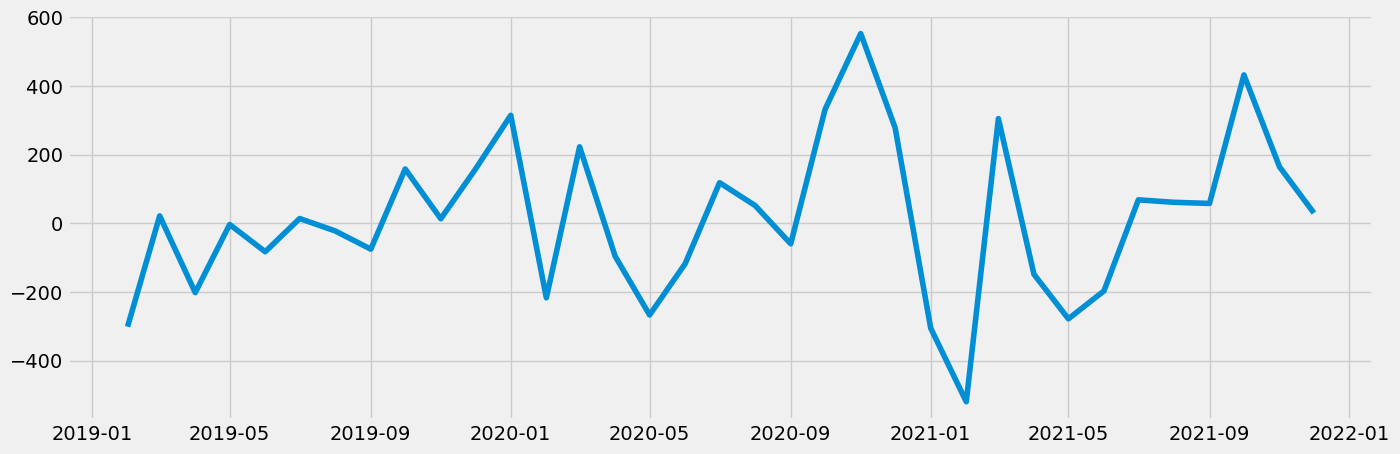

In [43]:
# Visualizong the new stationarized time series
plt.figure(figsize=(15,5), dpi=100)
plt.plot(sub_diff)
plt.show()

The trend seems to be taken out, but it is still hard to say for the seasonality.

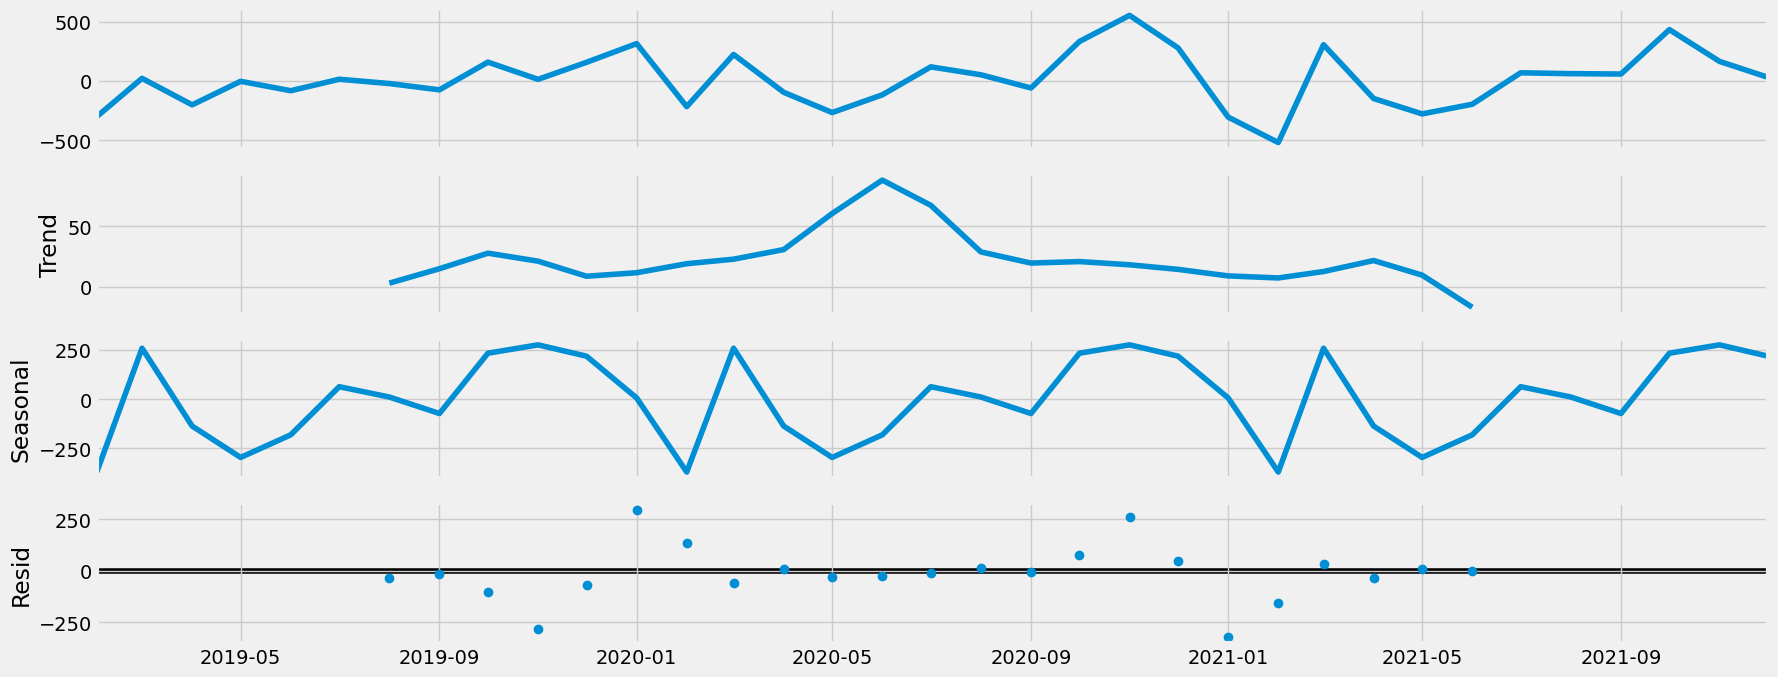

In [45]:
#checking the decompostion of the newly standardized time series
decomposition = sm.tsa.seasonal_decompose(sub_diff, model='additive')
decomposition.plot()
plt.show()

The decomposition shows that the trend as been evened out, that there remains a bit of seasonality and some residual noise.

### Dickey Fuller test
<div id='5.2'></div>

In [48]:
# Performing the Dickey-Fuller test:
dickey_fuller(sub_diff)

Dickey-Fuller Stationarity test:
Test Statistic                 -4.904733
p-value                         0.000034
Number of Lags Used             0.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


The fuller test, with a significant P-value (less than 0,05), now has a test value smaller than any critical value: it allows us to to reject the null hypothesis, meaning now **the time series is stationary** and ready for any forecasting

### Autocorrelation test
<div id='5.3'></div>

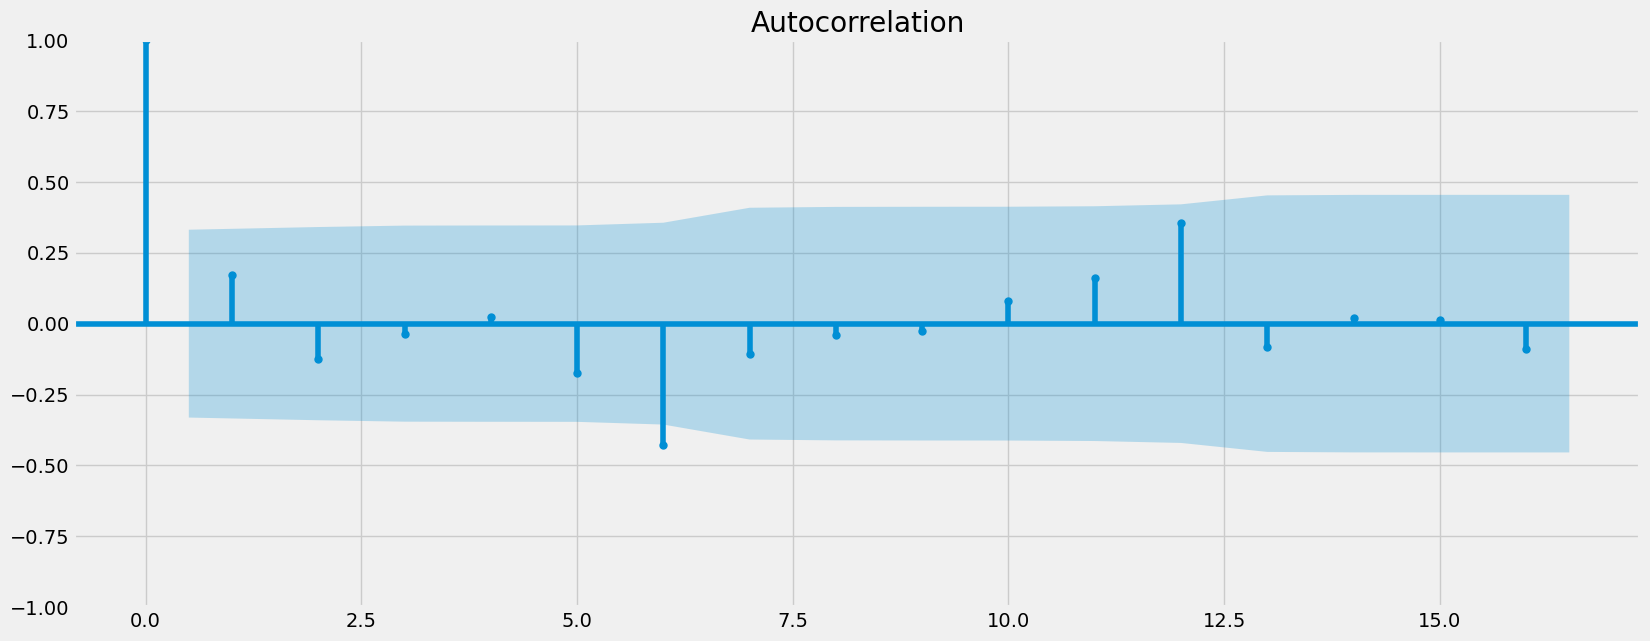

In [51]:
#checking for an autocorrelation in the tilme series
plot_acf(sub_diff)
plt.show()

The autocorrelation wasn't an issue at first, the standardization didn't make it worse with still 2 acceptable gaps above the confidence level.

## 6. Conclusions
<div id='6'></div>

- The data used is standardized, accounting for death rates per 100k inhabitants, so the small positive trend on death rates is quite surprising (decorrelated to the rising of populations).
- There has been a peek on mortality in Europe by the end of 2020 (november), which did not affect the seasonality for 2021, winter times having higher deaths rates.
- The time range is small, from 2019 to 2021, and heavily impacted by the latest covid pandemic, making any interpretation a bit hazardous.
- A forecast based on this data set could try to forecast only about six months, given a similar context.

## 7. ARIMA Forecasting

*Let's see if the prepared and standardized data set allows for a forecast on the first semester of 2022*

<div id='7'></div>

### Defining parameters
<div id='7.1'></div>

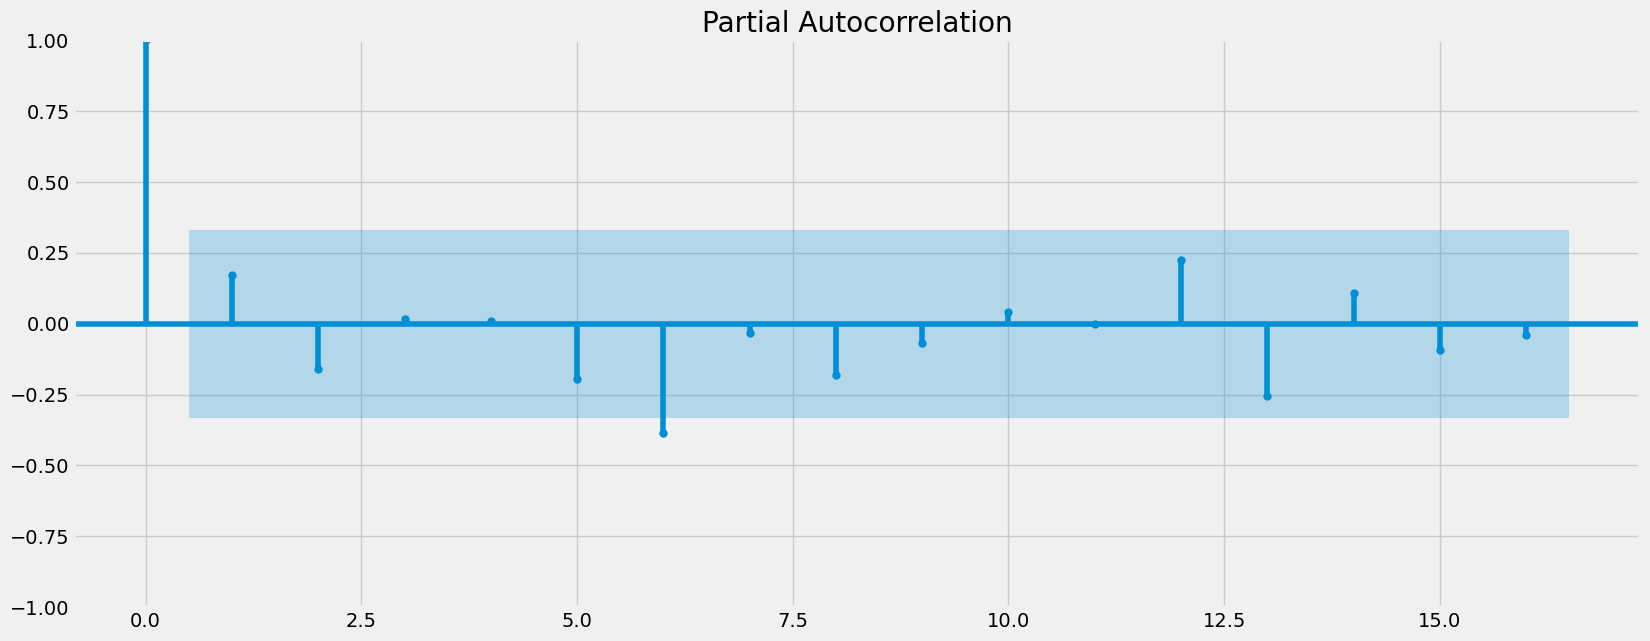

<Figure size 4500x4500 with 0 Axes>

In [57]:
# Plot partial autocorrelations to determine parameter 'p'

plot_pacf(sub_diff)
plt.figure(figsize=(15,15), dpi=300)
plt.show()

There is only one highly positive bar, showing relative correlations: 3 AR terms ot compensate could be a good starting point. **This makes p = 3**

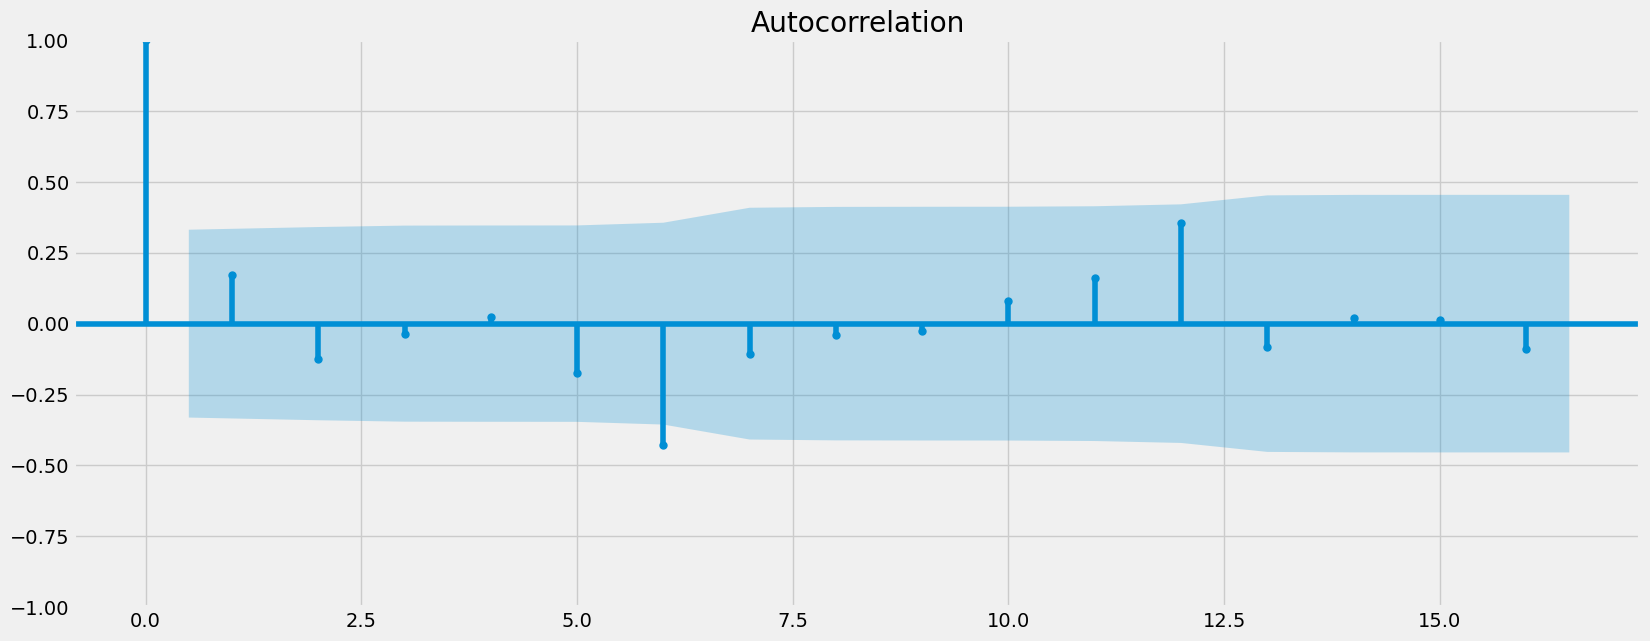

<Figure size 1500x500 with 0 Axes>

In [59]:
# Plot autocorrelations to determine parameter 'q'

plot_acf(sub_diff)
plt.figure(figsize=(15,5), dpi=100)
plt.show()

There are only 2 significant autocorrelations here, so a small term of 1 could do it at first. **This makes up q = 1**

### Splitting the data

There are only 36 points, so training on the first 30 entries and testing on the last 5 (by july 2021) is a good start:

<div id='7.2'></div>

In [62]:
# Split the data

train = sub_final['sum_all_countries'][:30]
test = sub_final['sum_all_countries'][29:]

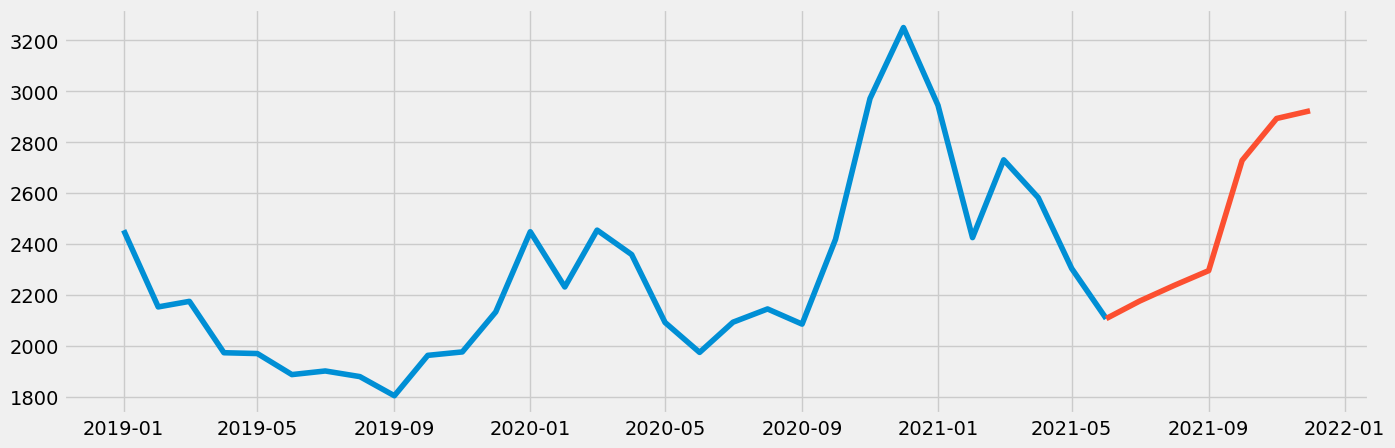

In [63]:
# Plotting both sets in order to see the split

plt.figure(figsize=(15,5), dpi=100)
plt.plot(train)
plt.plot(test)
plt.show()

In [64]:
test.shape

(7,)

### Running and Fitting the Model
<div id='7.3'></div>

                               SARIMAX Results                                
Dep. Variable:      sum_all_countries   No. Observations:                   30
Model:                 ARIMA(3, 1, 1)   Log Likelihood                -198.726
Date:                Mon, 14 Oct 2024   AIC                            409.451
Time:                        18:44:27   BIC                            417.655
Sample:                    01-01-2019   HQIC                           412.021
                         - 06-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -10.4500     50.947     -0.205      0.837    -110.305      89.405
ar.L1         -0.2280     10.869     -0.021      0.983     -21.531      21.075
ar.L2         -0.1164      1.586     -0.073      0.9

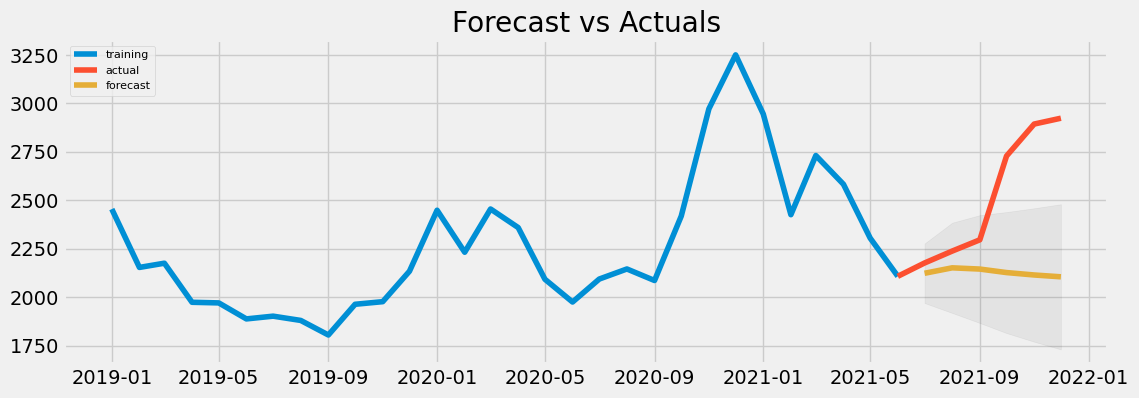

In [66]:
p = 3 # AR order
d = 1 # Integration order
q = 1 # MA order

model = ARIMA(train, order=(p, d, q), trend="t")
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
fc = fitted.get_forecast(steps = 6) 
int = fc.summary_frame(alpha = 0.5) #95% confidence level

# Make into pandas series
fc_series = pd.Series(int['mean'], index=test.index)
lower_series = pd.Series(int['mean_ci_lower'], index=test.index)
upper_series = pd.Series(int['mean_ci_upper'], index=test.index)

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

The Z-score being far from 0 there are no significant AR or MA terms

### Iterating
<div id='7.4'></div>

**1- First attempt by reducing the AR to 1**

                               SARIMAX Results                                
Dep. Variable:      sum_all_countries   No. Observations:                   30
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -198.904
Date:                Mon, 14 Oct 2024   AIC                            405.808
Time:                        18:44:27   BIC                            411.277
Sample:                    01-01-2019   HQIC                           407.521
                         - 06-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1           -14.1747     48.689     -0.291      0.771    -109.603      81.253
ar.L1         -0.4337      0.905     -0.479      0.632      -2.208       1.340
ma.L1          0.6070      0.910      0.667      0.5

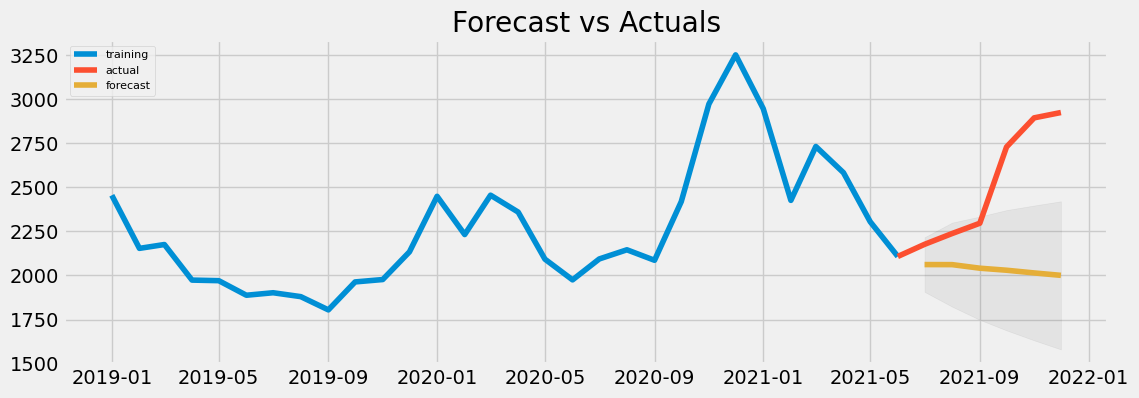

In [70]:
p = 1 # AR order
d = 1 # Integration order
q = 1 # MA order

model = ARIMA(train, order=(p, d, q), trend="t")
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
fc = fitted.get_forecast(steps = 6) 
int = fc.summary_frame(alpha = 0.5) #95% confidence level

# Make into pandas series
fc_series = pd.Series(int['mean'], index=test.index)
lower_series = pd.Series(int['mean_ci_lower'], index=test.index)
upper_series = pd.Series(int['mean_ci_upper'], index=test.index)

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

The significance of the AR and MA are slightly better, but the prediction is stil frar from perfect : There is no lowering the AR anymore, so let's rise MA to 3

**2- second attempt by rising the MA to 3**

                               SARIMAX Results                                
Dep. Variable:      sum_all_countries   No. Observations:                   30
Model:                 ARIMA(1, 1, 3)   Log Likelihood                -197.311
Date:                Mon, 14 Oct 2024   AIC                            406.621
Time:                        18:44:27   BIC                            414.825
Sample:                    01-01-2019   HQIC                           409.191
                         - 06-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            14.3272     17.986      0.797      0.426     -20.925      49.579
ar.L1          0.4489      0.597      0.752      0.452      -0.722       1.620
ma.L1         -0.5031      0.771     -0.652      0.5

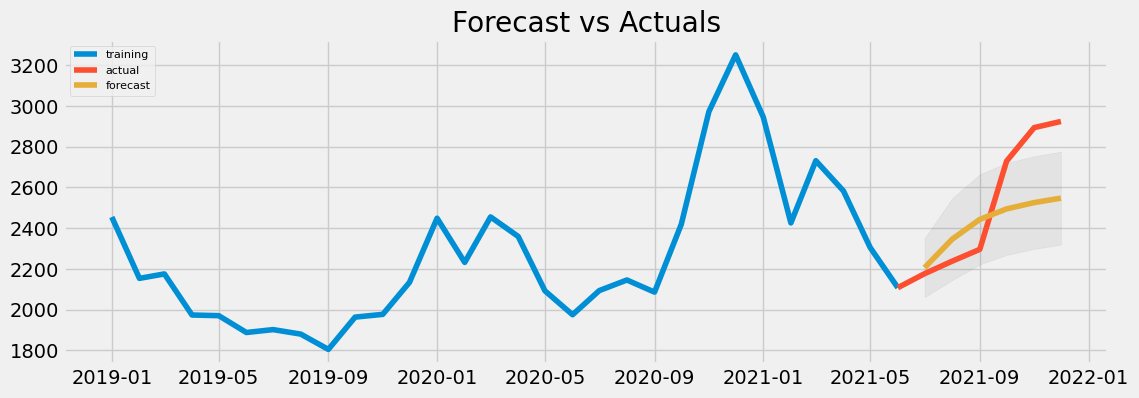

In [73]:
p = 1 # AR order
d = 1 # Integration order
q = 3 # MA order

model = ARIMA(train, order=(p, d, q), trend="t")
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
fc = fitted.get_forecast(steps = 6) 
int = fc.summary_frame(alpha = 0.5) #95% confidence level

# Make into pandas series
fc_series = pd.Series(int['mean'], index=test.index)
lower_series = pd.Series(int['mean_ci_lower'], index=test.index)
upper_series = pd.Series(int['mean_ci_upper'], index=test.index)

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Definitly going in the right direction, adding 2 MA could be interesting

**3- second attempt by rising the MA to 5**

                               SARIMAX Results                                
Dep. Variable:      sum_all_countries   No. Observations:                   30
Model:                 ARIMA(1, 1, 5)   Log Likelihood                -196.678
Date:                Mon, 14 Oct 2024   AIC                            409.355
Time:                        18:44:28   BIC                            420.293
Sample:                    01-01-2019   HQIC                           412.781
                         - 06-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            15.6818     28.363      0.553      0.580     -39.909      71.273
ar.L1          0.3649      0.749      0.487      0.626      -1.104       1.834
ma.L1         -0.5241      1.752     -0.299      0.7

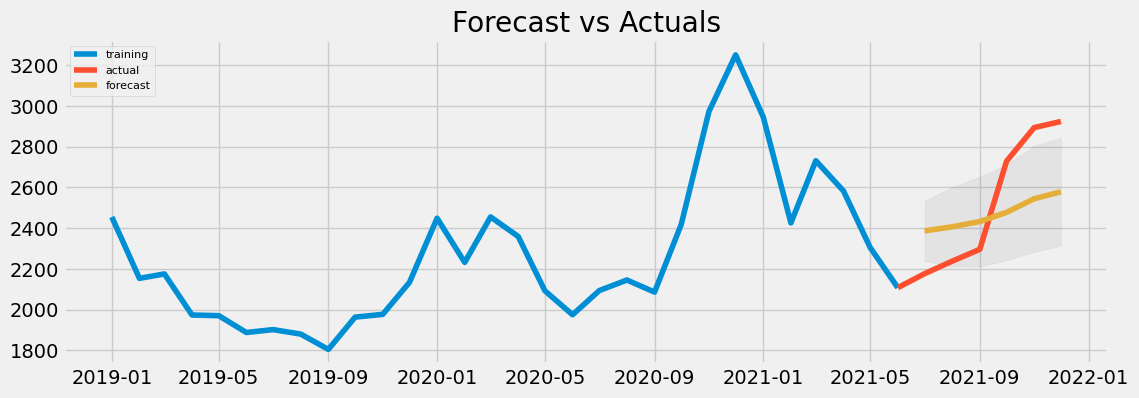

In [76]:
p = 1 # AR order
d = 1 # Integration order
q = 5 # MA order

model = ARIMA(train, order=(p, d, q), trend="t")
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
fc = fitted.get_forecast(steps = 6) 
int = fc.summary_frame(alpha = 0.5) #95% confidence level

# Make into pandas series
fc_series = pd.Series(int['mean'], index=test.index)
lower_series = pd.Series(int['mean_ci_lower'], index=test.index)
upper_series = pd.Series(int['mean_ci_upper'], index=test.index)

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Better, rising a bit more MA terms:

**4- second attempt by rising the MA to 8**

                               SARIMAX Results                                
Dep. Variable:      sum_all_countries   No. Observations:                   30
Model:                 ARIMA(1, 1, 8)   Log Likelihood                -194.033
Date:                Mon, 14 Oct 2024   AIC                            410.066
Time:                        18:44:29   BIC                            425.106
Sample:                    01-01-2019   HQIC                           414.776
                         - 06-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            27.3700     37.252      0.735      0.463     -45.643     100.383
ar.L1         -0.9998      0.038    -26.580      0.000      -1.073      -0.926
ma.L1          1.4106      1.353      1.042      0.2

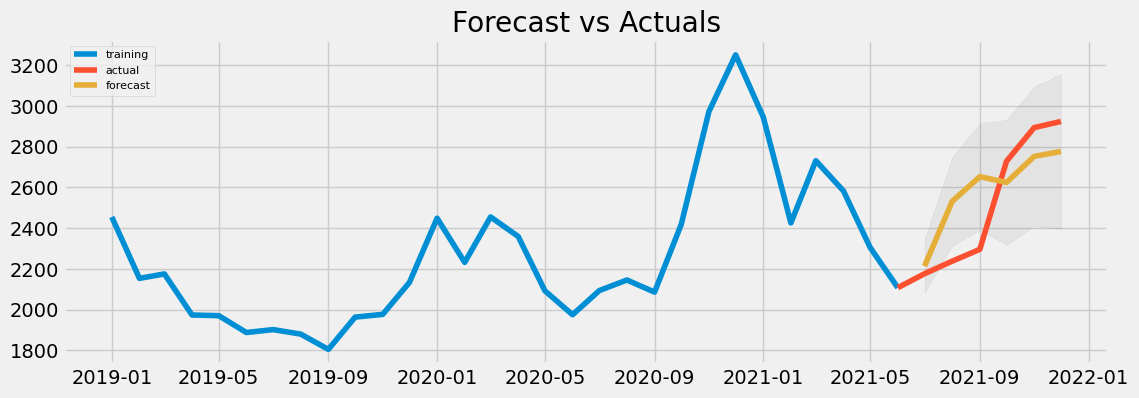

In [79]:
p = 1 # AR order
d = 1 # Integration order
q = 8 # MA order

model = ARIMA(train, order=(p, d, q), trend="t")
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
fc = fitted.get_forecast(steps = 6) 
int = fc.summary_frame(alpha = 0.5) #95% confidence level

# Make into pandas series
fc_series = pd.Series(int['mean'], index=test.index)
lower_series = pd.Series(int['mean_ci_lower'], index=test.index)
upper_series = pd.Series(int['mean_ci_upper'], index=test.index)

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Although not perfect, this model is the best so far, with a good significance level on AR and lacking a bit on the AR terms.

### Applying the model to forecast the first semestre of 2022
<div id='7.5'></div>

                               SARIMAX Results                                
Dep. Variable:      sum_all_countries   No. Observations:                   36
Model:                 ARIMA(1, 1, 8)   Log Likelihood                -234.436
Date:                Mon, 14 Oct 2024   AIC                            490.871
Time:                        18:44:29   BIC                            507.980
Sample:                    01-01-2019   HQIC                           496.777
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            19.2404     22.078      0.871      0.384     -24.033      62.513
ar.L1         -0.9999      0.032    -30.939      0.000      -1.063      -0.937
ma.L1          1.4467      0.324      4.468      0.0

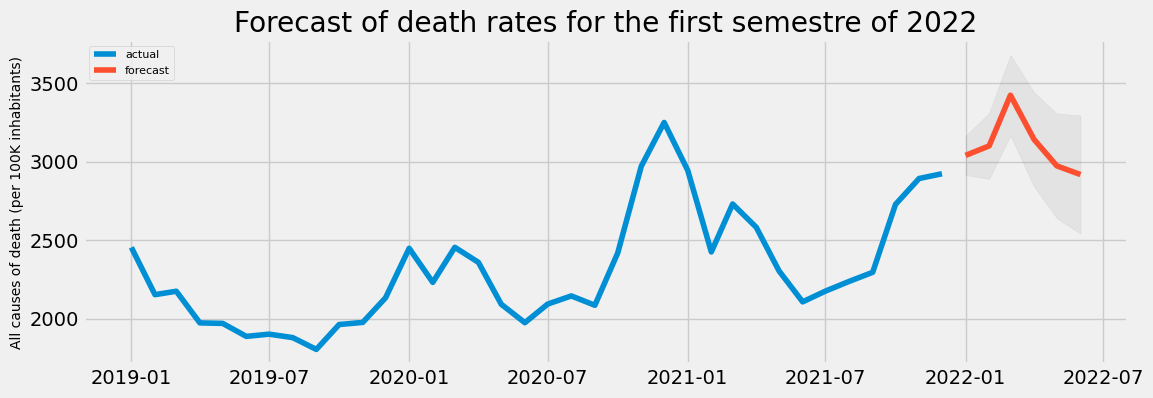

In [82]:
p = 1 # AR order
d = 1 # Integration order
q = 8 # MA order

model = ARIMA(sub_final, order=(p, d, q), trend="t")
fitted = model.fit()  
print(fitted.summary()) # Check model summary

# Forecast
fc = fitted.get_forecast(steps = 6)  # for the first 6 months of 2022
int = fc.summary_frame(alpha = 0.5) #95% confidence level

# Make into pandas series
fc_series = pd.Series(int['mean'])
lower_series = pd.Series(int['mean_ci_lower'])
upper_series = pd.Series(int['mean_ci_upper'])

# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(sub_final, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast of death rates for the first semestre of 2022')
plt.legend(loc='upper left', fontsize=8)
plt.ylabel('All causes of death (per 100K inhabitants)', fontsize =10)
plt.savefig(os.path.join(path_viz,'deaths_forecast_2022s1.png'), dpi=300, transparent=False, bbox_inches='tight', pad_inches=0.25)
plt.show()

**Given a Covid 19 comparable for 2022, death rates should increase at the beginning of 2022 and decrease while summer arrives.**

The accuracy of the model isn't perfect since it was only fed with only 36 entry points and is solely on the Covid period, not accounting for the previous time period before the pandemic